In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fontTools.misc.plistlib import end_false
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.font_manager as fm
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
adult_columns = [
"age",
"workclass",
"fnlwgt",
"education",
"education-num",
"marital-status",
"occupation",
"relationship",
"race",
"sex",
"capital-gain",
"capital-loss",
"hours-per-week",
"native-country",
"income"
]
df = pd.read_csv('adult.data')
df.columns = adult_columns
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
type(df)
retail_df = df.drop(["education","marital-status","fnlwgt","capital-gain","capital-loss","workclass"], axis=1, inplace=False)
retail_df["age"] = retail_df["age"] // 10
retail_df.head()

,age,education-num,occupation,relationship,race,sex,hours-per-week,native-country,income
0,5,13,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,3,9,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,5,7,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,2,13,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,3,14,Exec-managerial,Wife,White,Female,40,United-States,<=50K


In [4]:
pd.DataFrame([
  {"age":len(retail_df["age"].value_counts()),
  "education-num": len(retail_df["education-num"].value_counts()),
  "occupation": len(retail_df["occupation"].value_counts()),
   "relationship": len(retail_df["relationship"].value_counts()),
   "race": len(retail_df["race"].value_counts()),
   "sex": len(retail_df["sex"].value_counts()),
   "hours_per_week": len(retail_df["hours-per-week"].value_counts()),
   "native-country": len(retail_df["native-country"].value_counts()),
   "income": len(retail_df["income"].value_counts()),
   }
],
  columns = ["age","education-num","occupation","relationship","race","sex","hours_per_week","native-country","income"],
  index= ["counts"]
)

,age,education-num,occupation,relationship,race,sex,hours_per_week,native-country,income
counts,9,16,15,6,5,2,94,42,2


In [5]:
retail_df["native-country"].value_counts()

native-country
United-States                 29169
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

In [6]:
# retail_df = retail_df[retail_df["native-country"] != " ?"]
# retail_df["native-country"].value_counts()
retail_df["race"].value_counts()

race
White                 27815
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

In [7]:
transformer = ColumnTransformer(
    transformers=[
        ('country', OneHotEncoder(sparse=False), ['native-country']),
        ('occupation', OneHotEncoder(sparse=False), ['occupation']),
        ('relationship', OneHotEncoder(sparse=False), ['relationship']),
        ('race', OneHotEncoder(sparse=False), ['race']),
    ],
    remainder='passthrough'
)
encoded_array = transformer.fit_transform(retail_df)
encoded_df = pd.DataFrame(encoded_array, columns = transformer.get_feature_names_out())
encoded_df.head()

,country__native-country_ ?,country__native-country_ Cambodia,country__native-country_ Canada,country__native-country_ China,country__native-country_ Columbia,country__native-country_ Cuba,country__native-country_ Dominican-Republic,country__native-country_ Ecuador,country__native-country_ El-Salvador,country__native-country_ England,...,race__race_ Amer-Indian-Eskimo,race__race_ Asian-Pac-Islander,race__race_ Black,race__race_ Other,race__race_ White,remainder__age,remainder__education-num,remainder__sex,remainder__hours-per-week,remainder__income
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,5,13,Male,13,<=50K
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,3,9,Male,40,<=50K
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,5,7,Male,40,<=50K
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2,13,Female,40,<=50K
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,3,14,Female,40,<=50K


In [8]:
le = LabelEncoder()
encoded_df["remainder__sex"] = le.fit_transform(encoded_df["remainder__sex"])
encoded_df["remainder__income"] = le.fit_transform(encoded_df["remainder__income"])
encoded_df.head()
# Male 1, Female 0

,country__native-country_ ?,country__native-country_ Cambodia,country__native-country_ Canada,country__native-country_ China,country__native-country_ Columbia,country__native-country_ Cuba,country__native-country_ Dominican-Republic,country__native-country_ Ecuador,country__native-country_ El-Salvador,country__native-country_ England,...,race__race_ Amer-Indian-Eskimo,race__race_ Asian-Pac-Islander,race__race_ Black,race__race_ Other,race__race_ White,remainder__age,remainder__education-num,remainder__sex,remainder__hours-per-week,remainder__income
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,5,13,1,13,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,3,9,1,40,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,5,7,1,40,0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2,13,0,40,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,3,14,0,40,0


In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import pandas as pd

# 예시 데이터 (완전히 인코딩된 encoded_df)
# encoded_df는 원-핫 인코딩과 같은 변환이 완료된 상태여야 합니다.

# 1. 데이터 정규화 (Min-Max Scaling)
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(encoded_df), columns=encoded_df.columns)


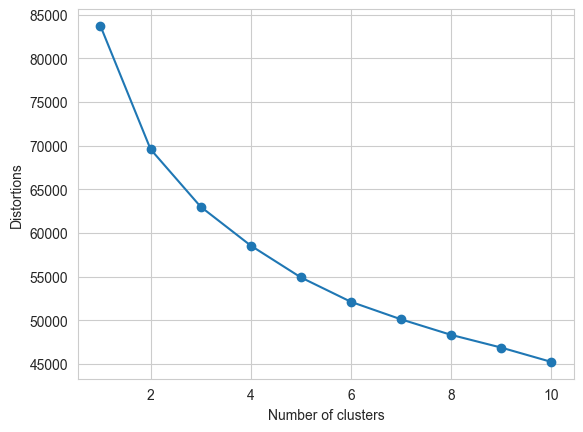

In [10]:
distortions = []

for i in range (1,11):
  # 모델 생성하는 방법, 1 ~ 10개까지 구성해서 , 테스트 해볼 예정.
  kmeans_i = KMeans(n_clusters=i, random_state=0)
  kmeans_i.fit(normalized_df)
  distortions.append(kmeans_i.inertia_)

plt.plot(range(1,11), distortions, marker = "o")
plt.xlabel("Number of clusters")
plt.ylabel("Distortions")
plt.show()

In [13]:
from matplotlib import cm

def silhouetteViz(n_clusters, X_features):
  kmeans = KMeans(n_clusters= n_clusters, random_state=0)
  Y_labels = kmeans.fit_predict(X_features)

  # 실루엣 값을 비교하기, 응집도, 분리도의차를 해당 최대값으로 나눈 비율
  # -1과 1사이의 값이었고, 결과적으로 1에 가까울수록 성능이 좋다.

#euclidean , 분리도에서, 거리 측정을 유클리드 거리의 계산을 이용했다.
  silhouette_values = silhouette_samples(X_features,Y_labels,metric="euclidean")
  y_ax_lower, y_ax_upper = 0, 0
  y_ticks = []

  for c in range(n_clusters):
    c_silhouettes = silhouette_values[Y_labels == c]
    c_silhouettes.sort()
    y_ax_upper += len(c_silhouettes)
    color = cm.jet(float(c)/ n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouettes, height=1.0, edgecolor = "none", color = color)
    y_ticks.append((y_ax_lower+y_ax_upper)/ 2.)
    y_ax_lower += len(c_silhouettes)

  silhouette_avg = np.mean(silhouette_values)
  plt.axvline(silhouette_avg, color="red", linestyle ="--")
  plt.title('Number of Cluster : '+str(n_clusters) + '\n' + 'silhouette_Score: ' + str(round(silhouette_avg,3) ))
  plt.yticks([0, 0.2, 0.4, 0.6, 0.8 , 1])
  plt.ylabel("Cluster")
  plt.xlabel("silhouette coefficient")
  plt.tight_layout()
  plt.show()

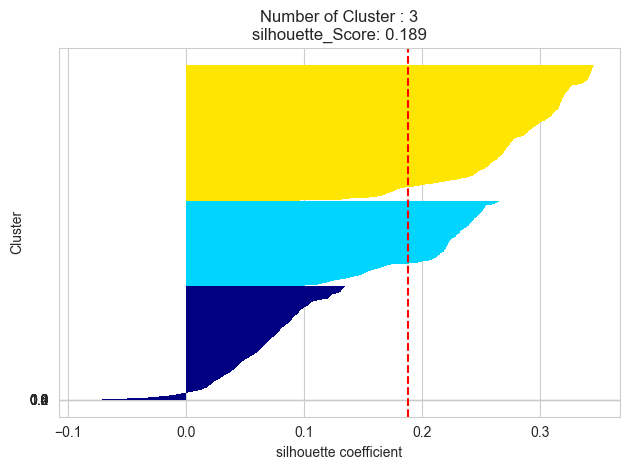

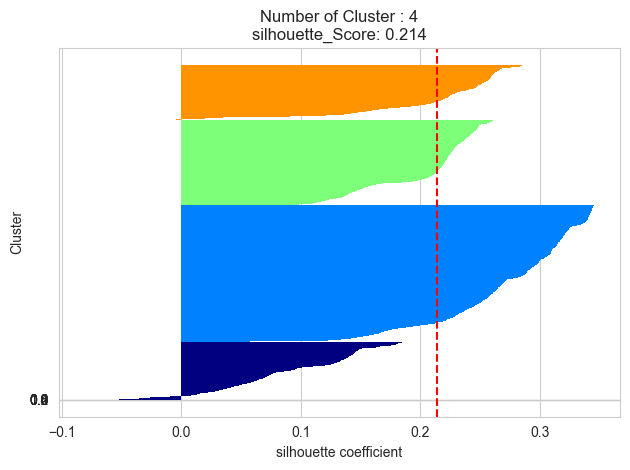

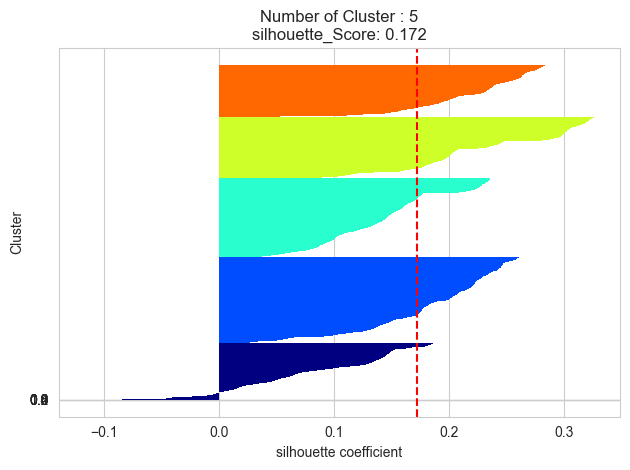

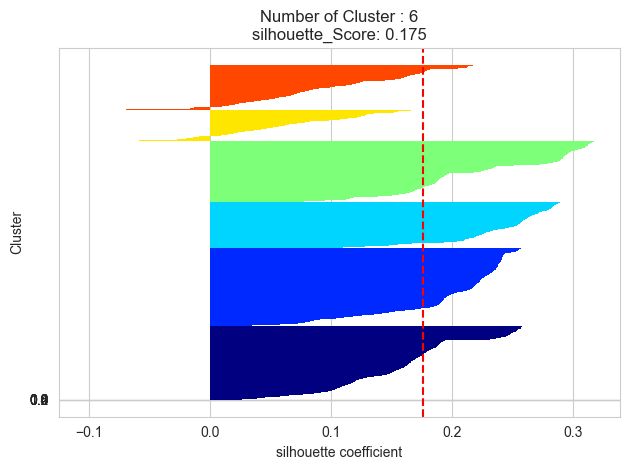

In [14]:
# 그래프 그리기.
# 실루엣 계수, 비중  비교하기.
silhouetteViz(3,normalized_df)
silhouetteViz(4,normalized_df)
silhouetteViz(5,normalized_df)
silhouetteViz(6,normalized_df)

In [16]:
def clusterScatter(n_clusters, X_features):
  c_colors = []
  kmeans = KMeans(n_clusters= n_clusters, random_state=0)
  Y_labels = kmeans.fit_predict(X_features)

  for i in range(n_clusters):
    c_color = cm.jet(float(i) / n_clusters)
    c_colors.append(c_color)

    # 클러스터의 데이터 분포를 동그라미로 시각화
    plt.scatter(X_features[Y_labels == i,0], X_features[Y_labels == i,1], marker="o", color = c_color, edgecolor = "black", s = 50 , label = 'cluster ' + str(i))

  # 각 클러스터 중심점을 삼각형으로 표시.
  for i in range(n_clusters):
    plt.scatter(kmeans.cluster_centers_[i,0], kmeans.cluster_centers_[i,1], marker="^", color = c_colors[i], edgecolor="w", s = 200 )

  plt.legend()
  plt.grid()
  plt.tight_layout()
  plt.show()

In [18]:
best_cluster = 4
# 최적 클러스터 값을 이용해서, 모델생성
kmeans = KMeans(n_clusters= best_cluster, random_state=0)
# 모델 이용해서, 예측 값 구함.
Y_labels = kmeans.fit_predict(normalized_df)
retail_df['cluster'] = Y_labels
retail_df.head()

,age,education-num,occupation,relationship,race,sex,hours-per-week,native-country,income,cluster
0,5,13,Exec-managerial,Husband,White,Male,13,United-States,<=50K,1
1,3,9,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,2
2,5,7,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,1
3,2,13,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,0
4,3,14,Exec-managerial,Wife,White,Female,40,United-States,<=50K,0


In [20]:
retail_df.to_csv('adult_cluster.csv')

In [26]:
retail_df.groupby('cluster').head()

,age,education-num,occupation,relationship,race,sex,hours-per-week,native-country,income,cluster
0,5,13,Exec-managerial,Husband,White,Male,13,United-States,<=50K,1
1,3,9,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,2
2,5,7,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,1
3,2,13,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,0
4,3,14,Exec-managerial,Wife,White,Female,40,United-States,<=50K,0
5,4,5,Other-service,Not-in-family,Black,Female,16,Jamaica,<=50K,2
6,5,9,Exec-managerial,Husband,White,Male,45,United-States,>50K,1
7,3,14,Prof-specialty,Not-in-family,White,Female,50,United-States,>50K,2
8,4,13,Exec-managerial,Husband,White,Male,40,United-States,>50K,1
9,3,10,Exec-managerial,Husband,Black,Male,80,United-States,>50K,1
